In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [84]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.drop(columns='RowNumber',inplace=True)




In [87]:
# Converting alphabetical fields in the dataset into numeric to better run correlation on 
customer_df = df
le = LabelEncoder()

customer_df['encoded_Geography'] = le.fit_transform(customer_df[['Geography']])
customer_df['encoded_Gender'] = le.fit_transform(customer_df[['Gender']])
customer_df['CardType'] = le.fit_transform(customer_df[['Card Type']])

customer_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,encoded_Geography,encoded_Gender,CardType
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,0,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,2,0,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,0,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,0,0,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,0,1,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,0,1,2
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,0,0,3
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,1,1,1


In [136]:
df.groupby('Geography').count()['Exited']

Geography
France     5014
Germany    2509
Spain      2477
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

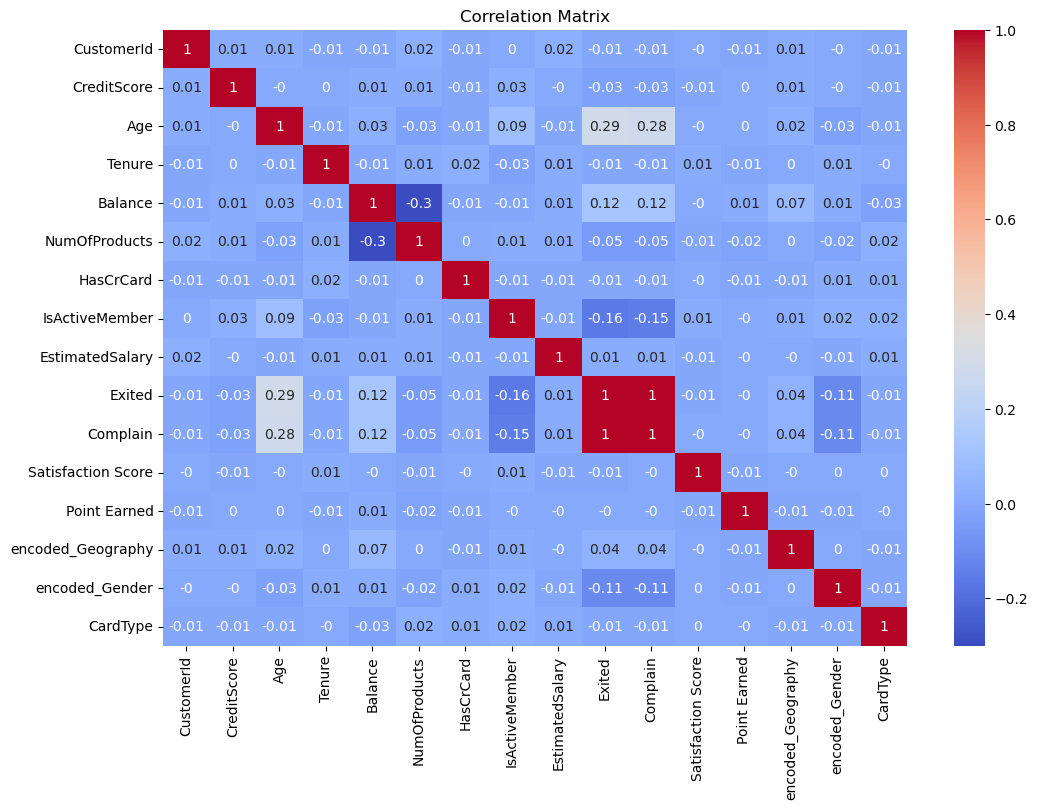

In [125]:


plt.figure(figsize=(12,8))
sns.heatmap(round(df.corr(),2), cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')



In [92]:
from sklearn.linear_model import LogisticRegression

feat = []
for column in customer_df.columns:
    if pd.api.types.is_numeric_dtype(customer_df[column]) and column !='Exited':
        feat.append(column)

X_to_select = customer_df[feat]
y_to_predict = customer_df['Exited']

regressor = LogisticRegression()

from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(regressor,
                                k_features=6,
                                forward=True,
                                scoring='neg_mean_squared_error',
                                )

selected_features = sfs.fit(X_to_select, y_to_predict)

sfselected = list(selected_features.k_feature_names_)

sfselected

['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'Complain']

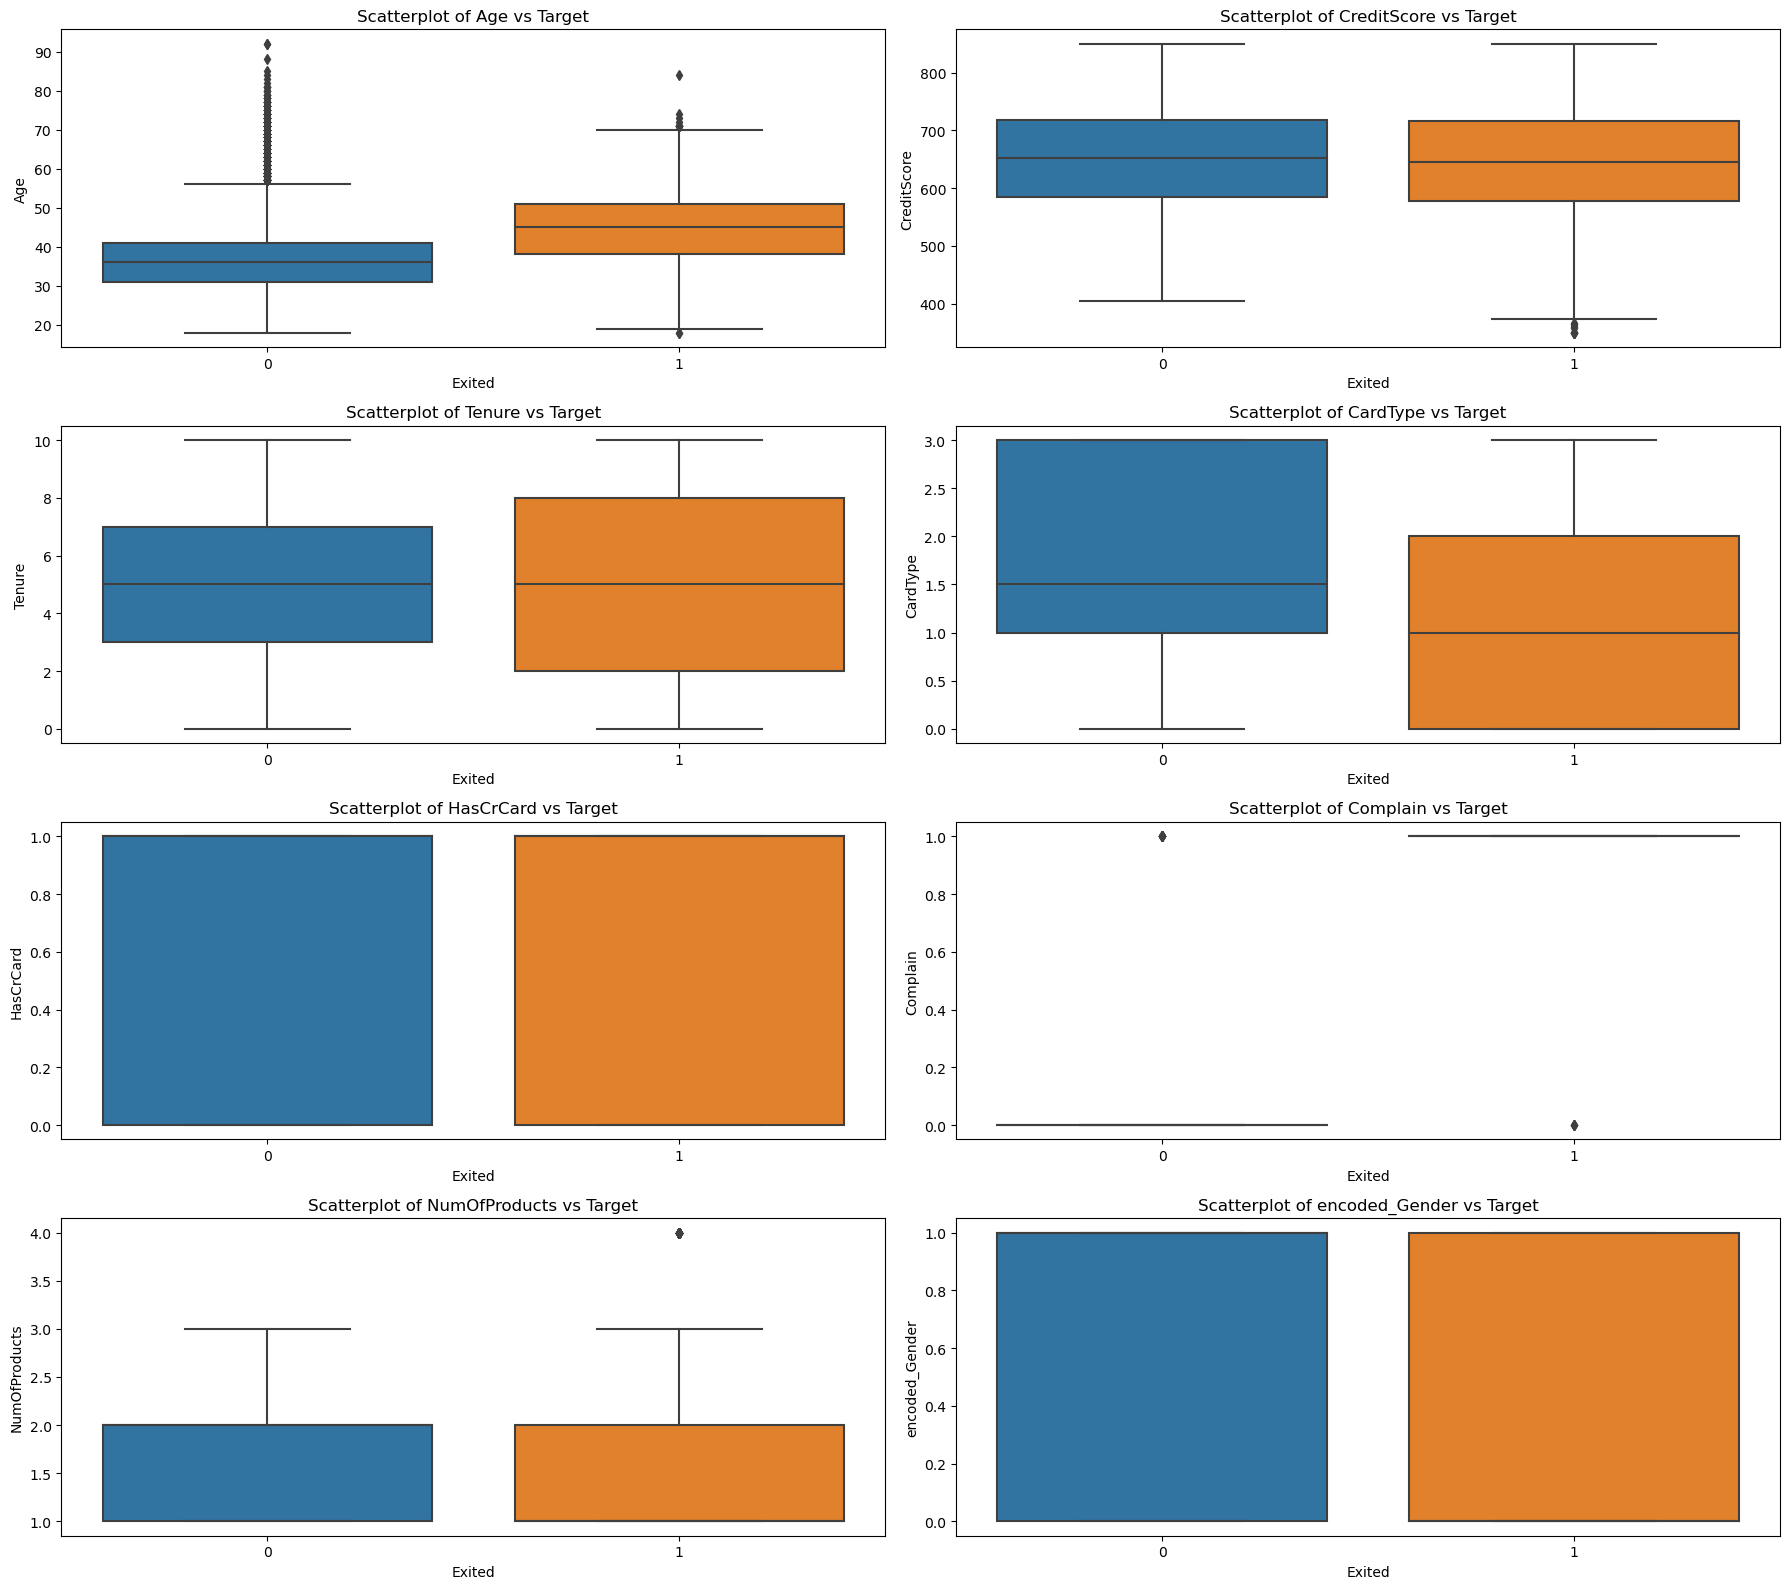

In [107]:
features = ['Age','CreditScore', 'Tenure', 'CardType','HasCrCard','Complain','NumOfProducts','encoded_Gender']


num_features = len(features)
num_columns = 2  # For example, 2 columns  
num_rows = np.ceil(num_features / num_columns).astype(int)  # Calculate the required number of rows 

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(6*3,4*4))

axes=axes.flatten()

if num_features == 1:
    axes= [axes]

for i, feature in enumerate(features):  
    sns.boxplot(x=customer_df['Exited'], y=customer_df[feature], ax=axes[i])  
    axes[i].set_xlabel('Exited')  
    axes[i].set_ylabel(feature)  
    axes[i].set_title(f'Scatterplot of {feature} vs Target')  
  
# Adjust layout for better fit  
plt.tight_layout()  
plt.show()  

Text(0.5, 1.02, 'Pair Plot of Features vs Exited')

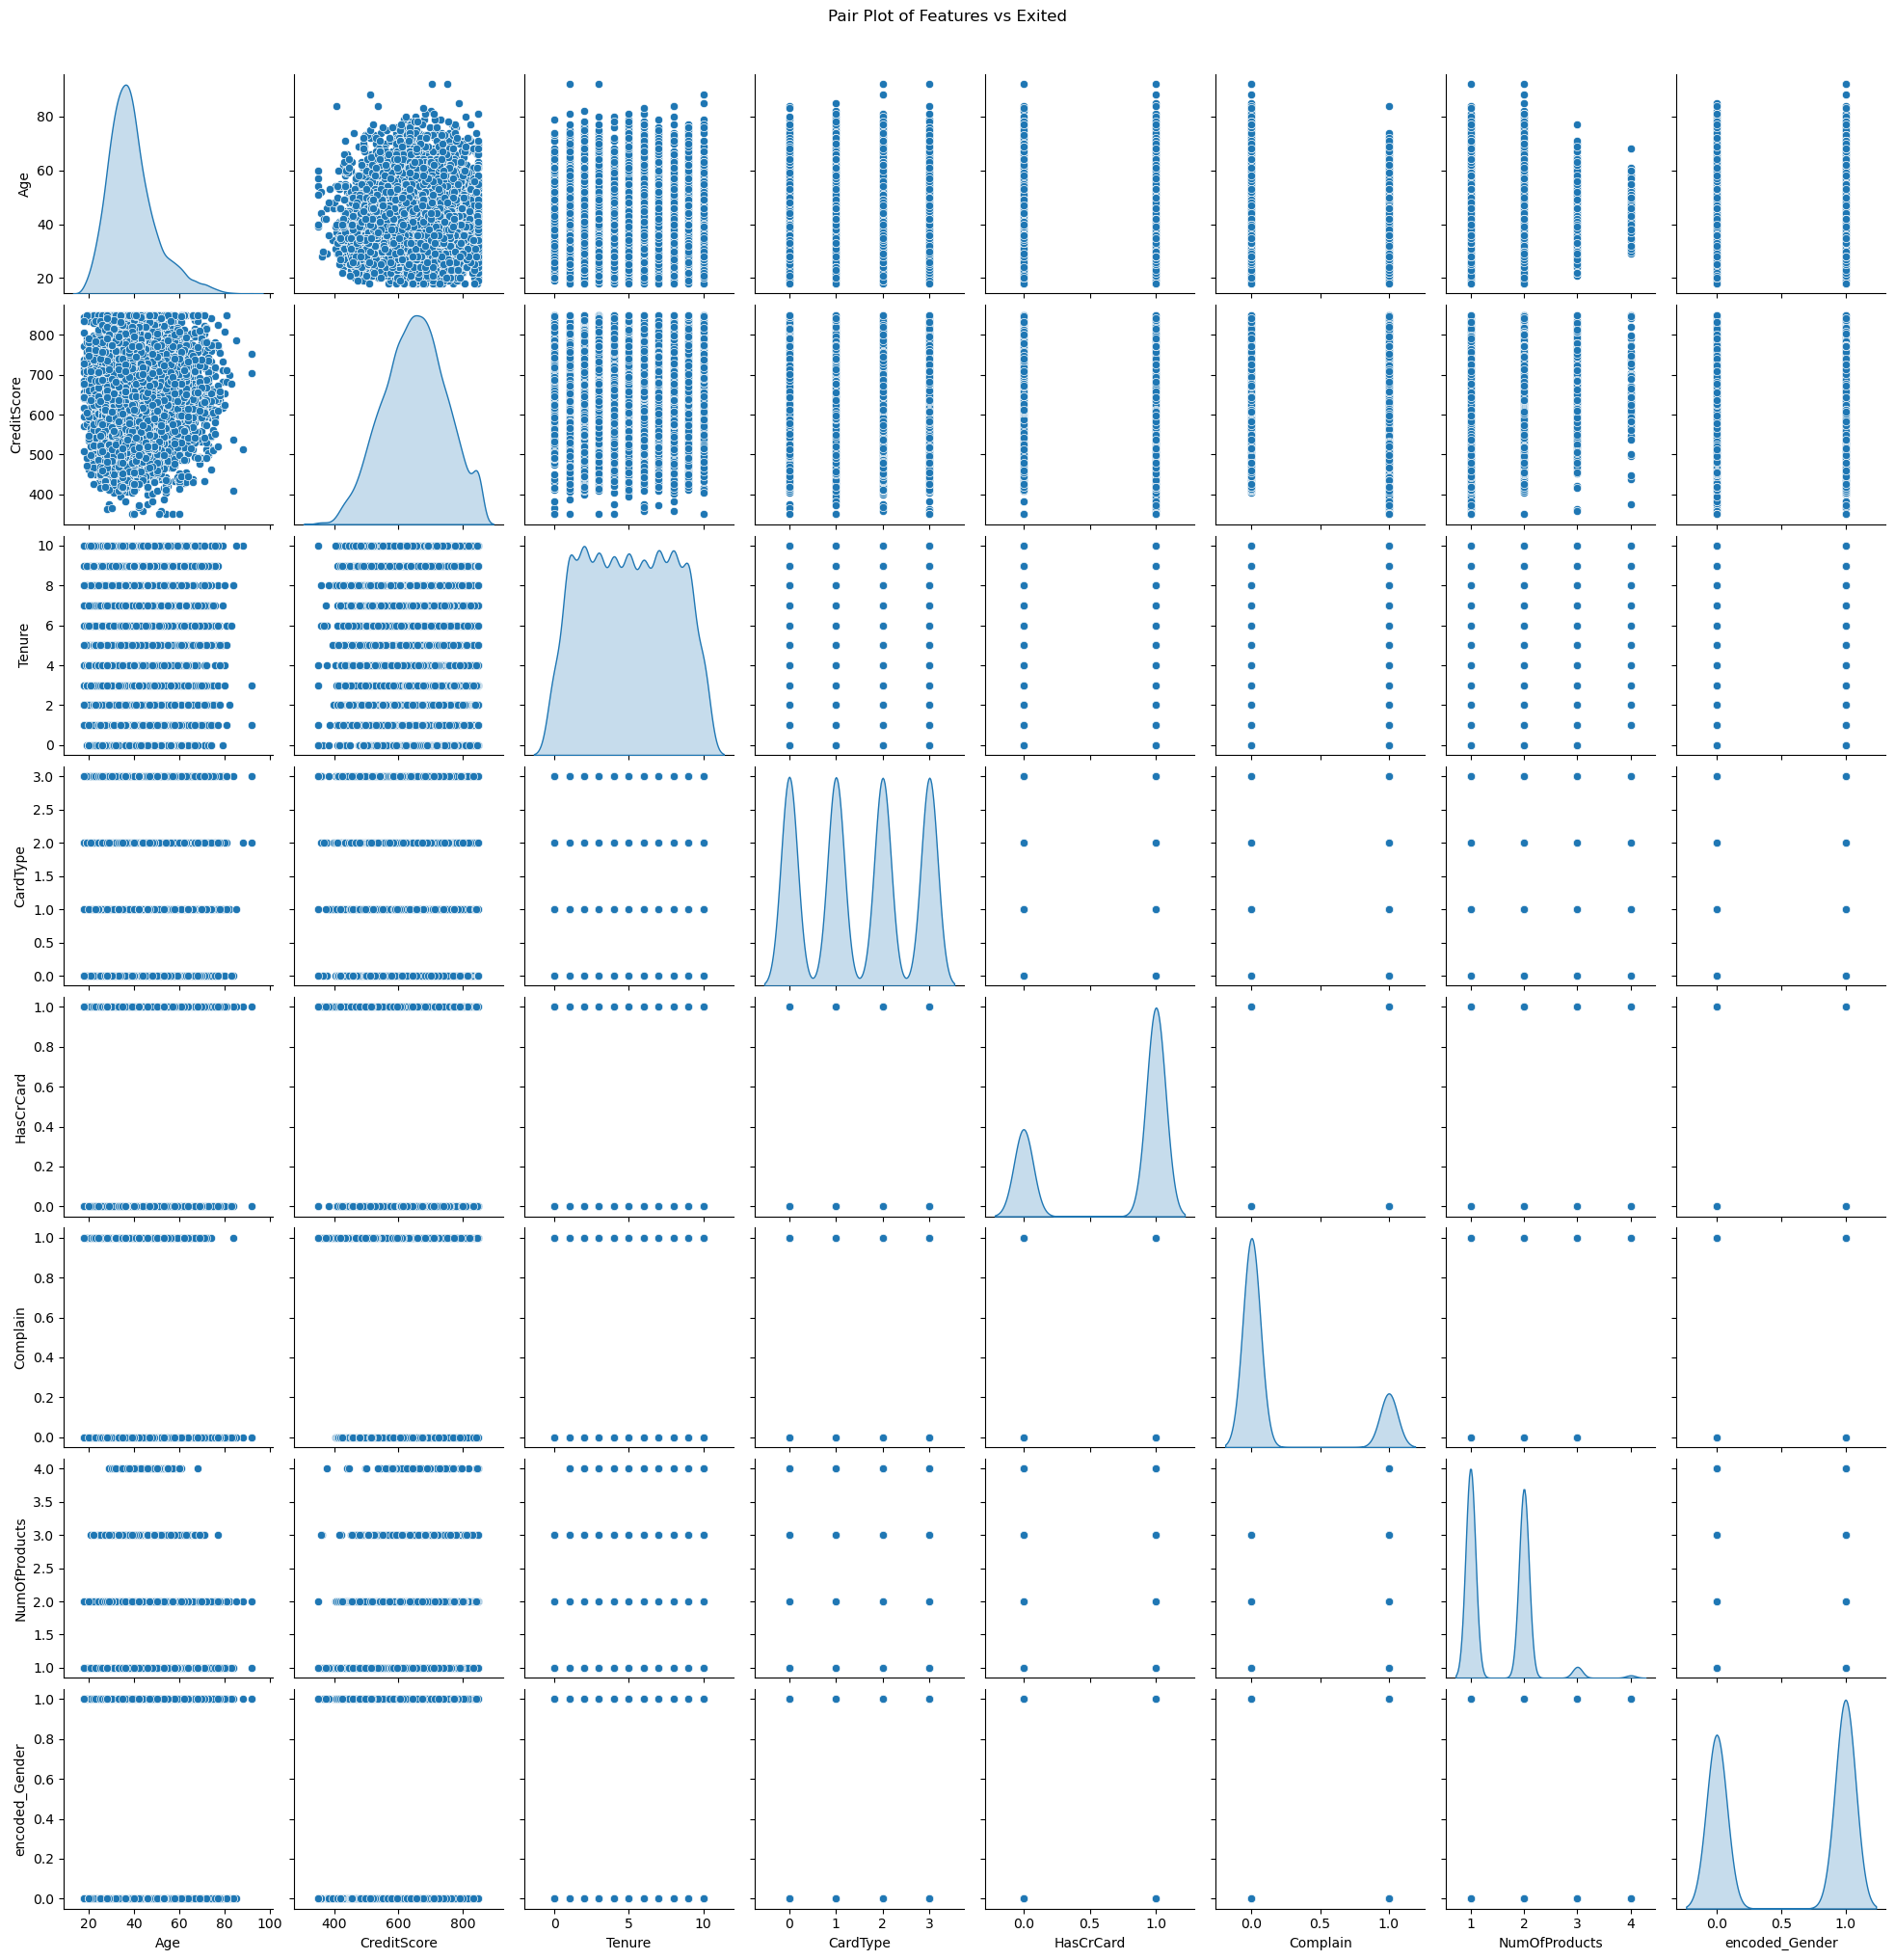

In [112]:

# Create a pair plot  
sns.pairplot(customer_df[features], diag_kind='kde')  
  
# Set the title for the pair plot  
plt.suptitle('Pair Plot of Features vs Exited', y=1.02)  

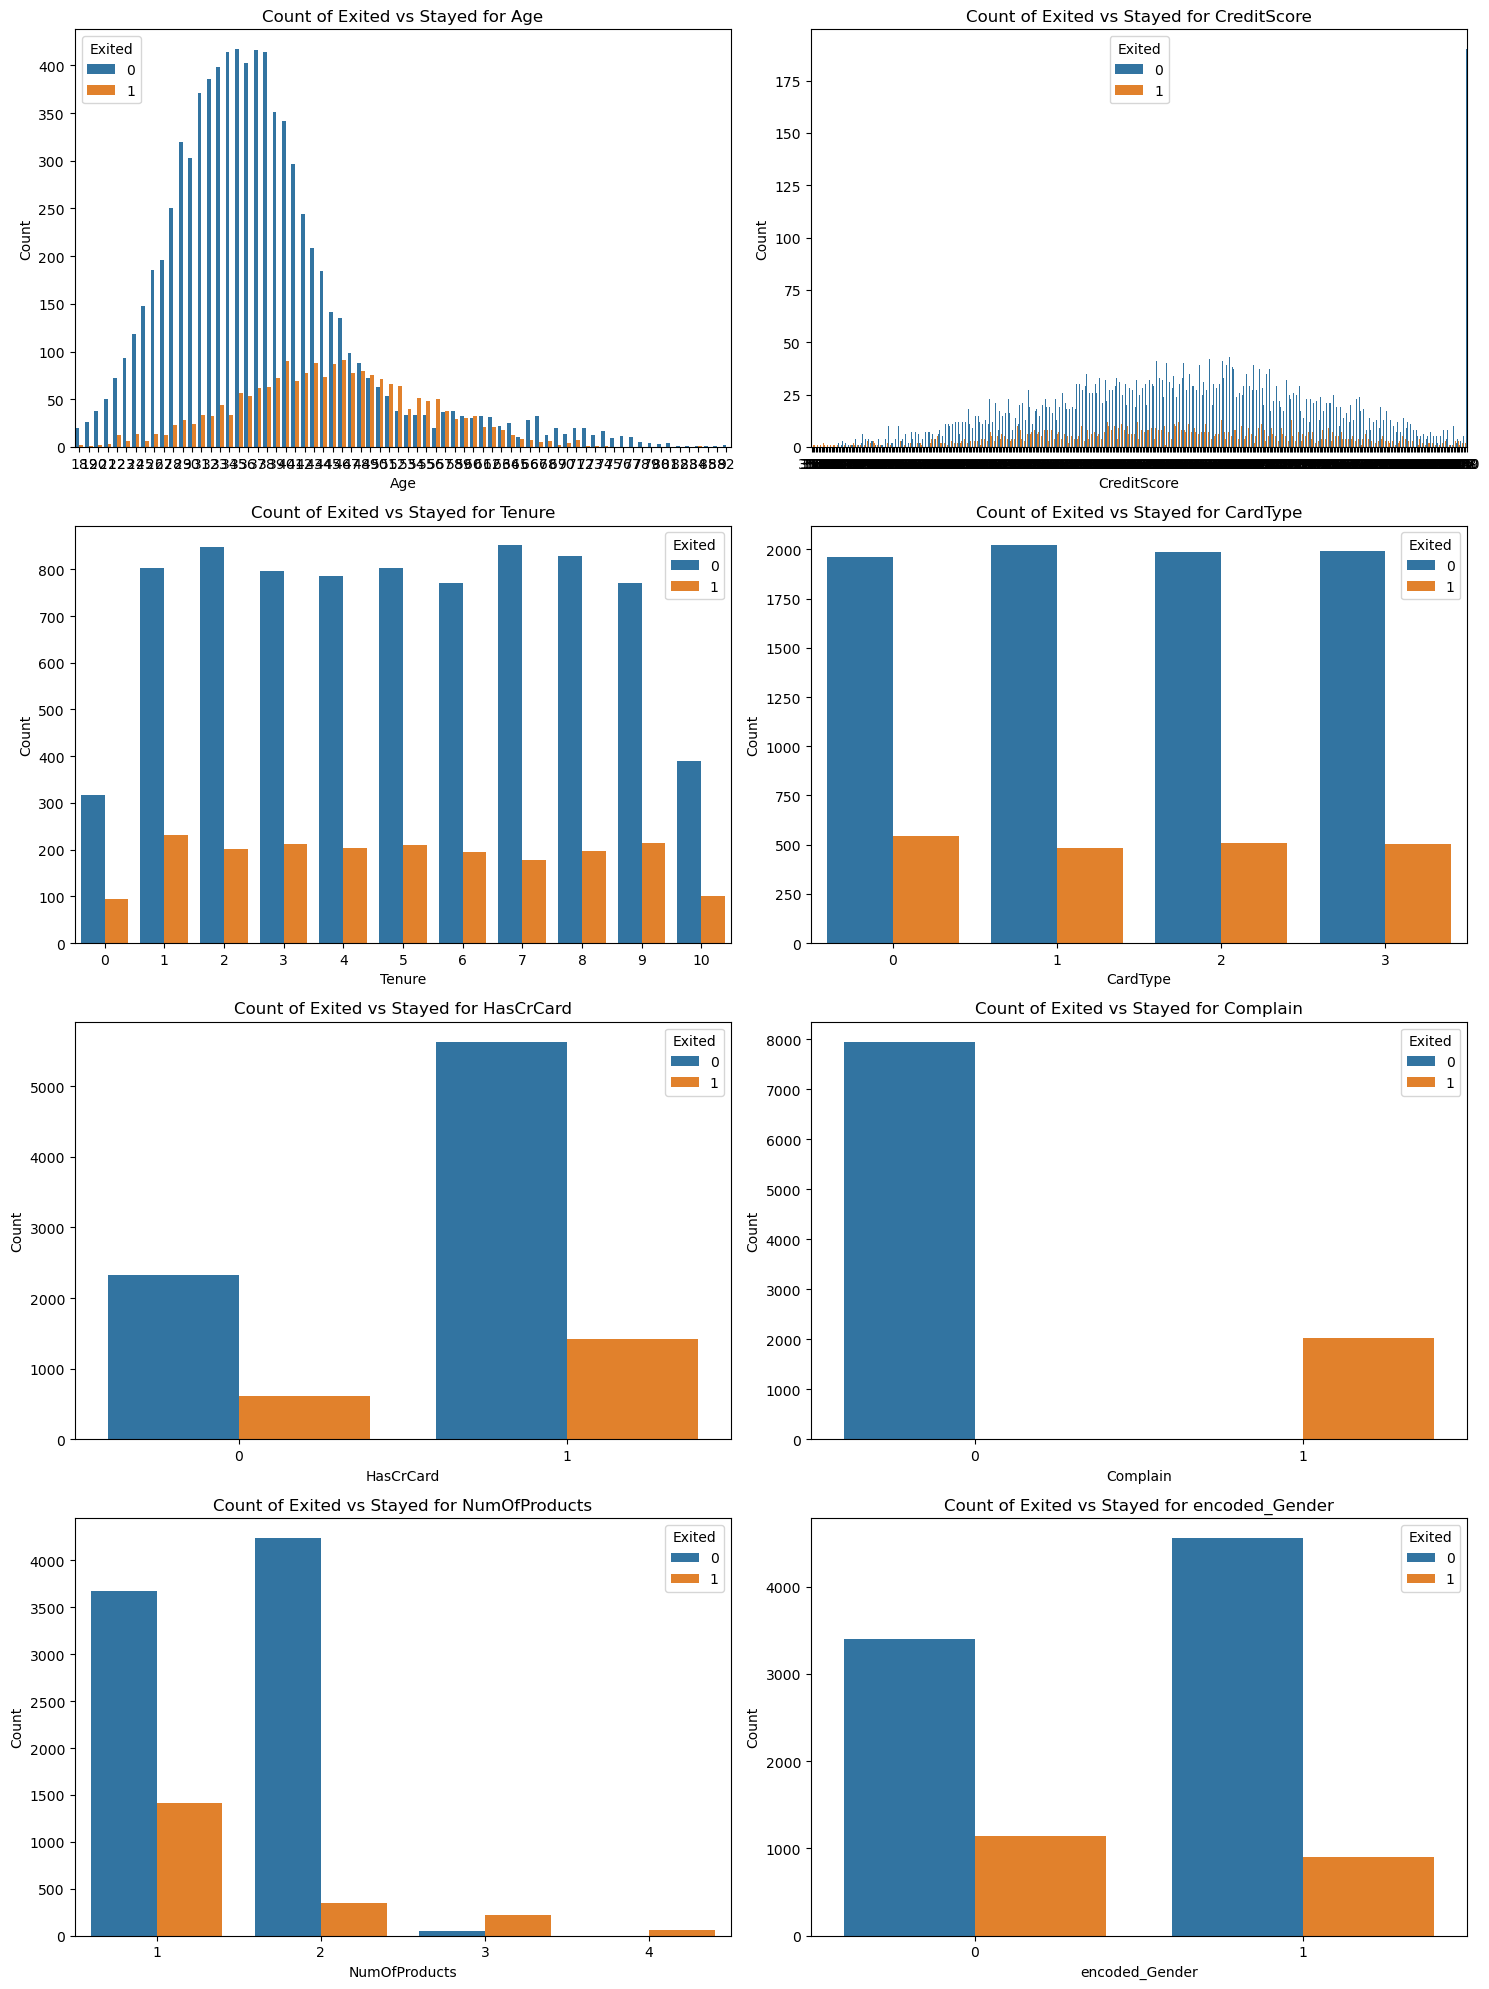

In [113]:
num_features = len(features)  
num_columns = 2  # For example, 2 columns  
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate the required number of rows  
  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))  
axes = axes.flatten()  
  
for i, feature in enumerate(features):  
    sns.countplot(x=feature, hue='Exited', data=customer_df, ax=axes[i])  
    axes[i].set_title(f'Count of Exited vs Stayed for {feature}')  
    axes[i].set_xlabel(feature)  
    axes[i].set_ylabel('Count')  
  
# Remove any empty subplots  
for j in range(i+1, len(axes)):  
    fig.delaxes(axes[j])  
  
# Adjust layout for better fit  
plt.tight_layout()  
plt.show()  

In [169]:
from sklearn.model_selection import train_test_split
y=customer_df.Exited
x=customer_df[sfselected]

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

regressor.fit(X_train,y_train)

regressor.score(X_test,y_test)

0.9976666666666667

In [161]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier()

ys=customer_df.Exited
xs=customer_df[sfselected]

X_trains,X_tests,y_trains,y_tests = train_test_split(xs,ys, test_size=0.3)

model_random.fit(X_trains,y_trains)
model_random.score(X_tests,y_tests)

0.9993333333333333

In [175]:
from sklearn.tree import DecisionTreeClassifier
model_tree= RandomForestClassifier()

ys=customer_df.Exited
xs=customer_df[sfselected]

X_trains,X_tests,y_trains,y_tests = train_test_split(xs,ys, test_size=0.3)

model_tree.fit(X_trains,y_trains)
model_tree.score(X_tests,y_tests)

0.9983333333333333